In [1]:
import enum
import seaborn as sns
from data_handling.Data_Processor import DataProcessor
import constants
import os
from statistics_methods.Statistics import StatisticsWrapper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [2]:
raw_data_path = constants.PATH_TO_CORTEX_4_PARAMS_RAW
chosen_rois_dict = constants.ROI_CORTEX
params_to_work_with = ['r1', 'tv', 'mt', 'r2s']

In [3]:
subjects_raw_data = DataProcessor(raw_data_path, chosen_rois_dict, chosen_rois_dict).get_data_proccessed()
analyzed_data = StatisticsWrapper.calc_mean_per_subject_per_parameter_per_ROI(subjects_raw_data, params_to_work_with)
chosen_data = StatisticsWrapper.chose_relevant_data(analyzed_data, chosen_rois_dict, params_to_work_with, params_to_work_with)

In [4]:
group_a_name, group_b_name, col_divider, threshold = constants.YOUNG, constants.OLD, 'Age', constants.AGE_THRESHOLD
young_subjects, old_subjects = StatisticsWrapper.seperate_data_to_two_groups(chosen_data, col_divider, threshold)

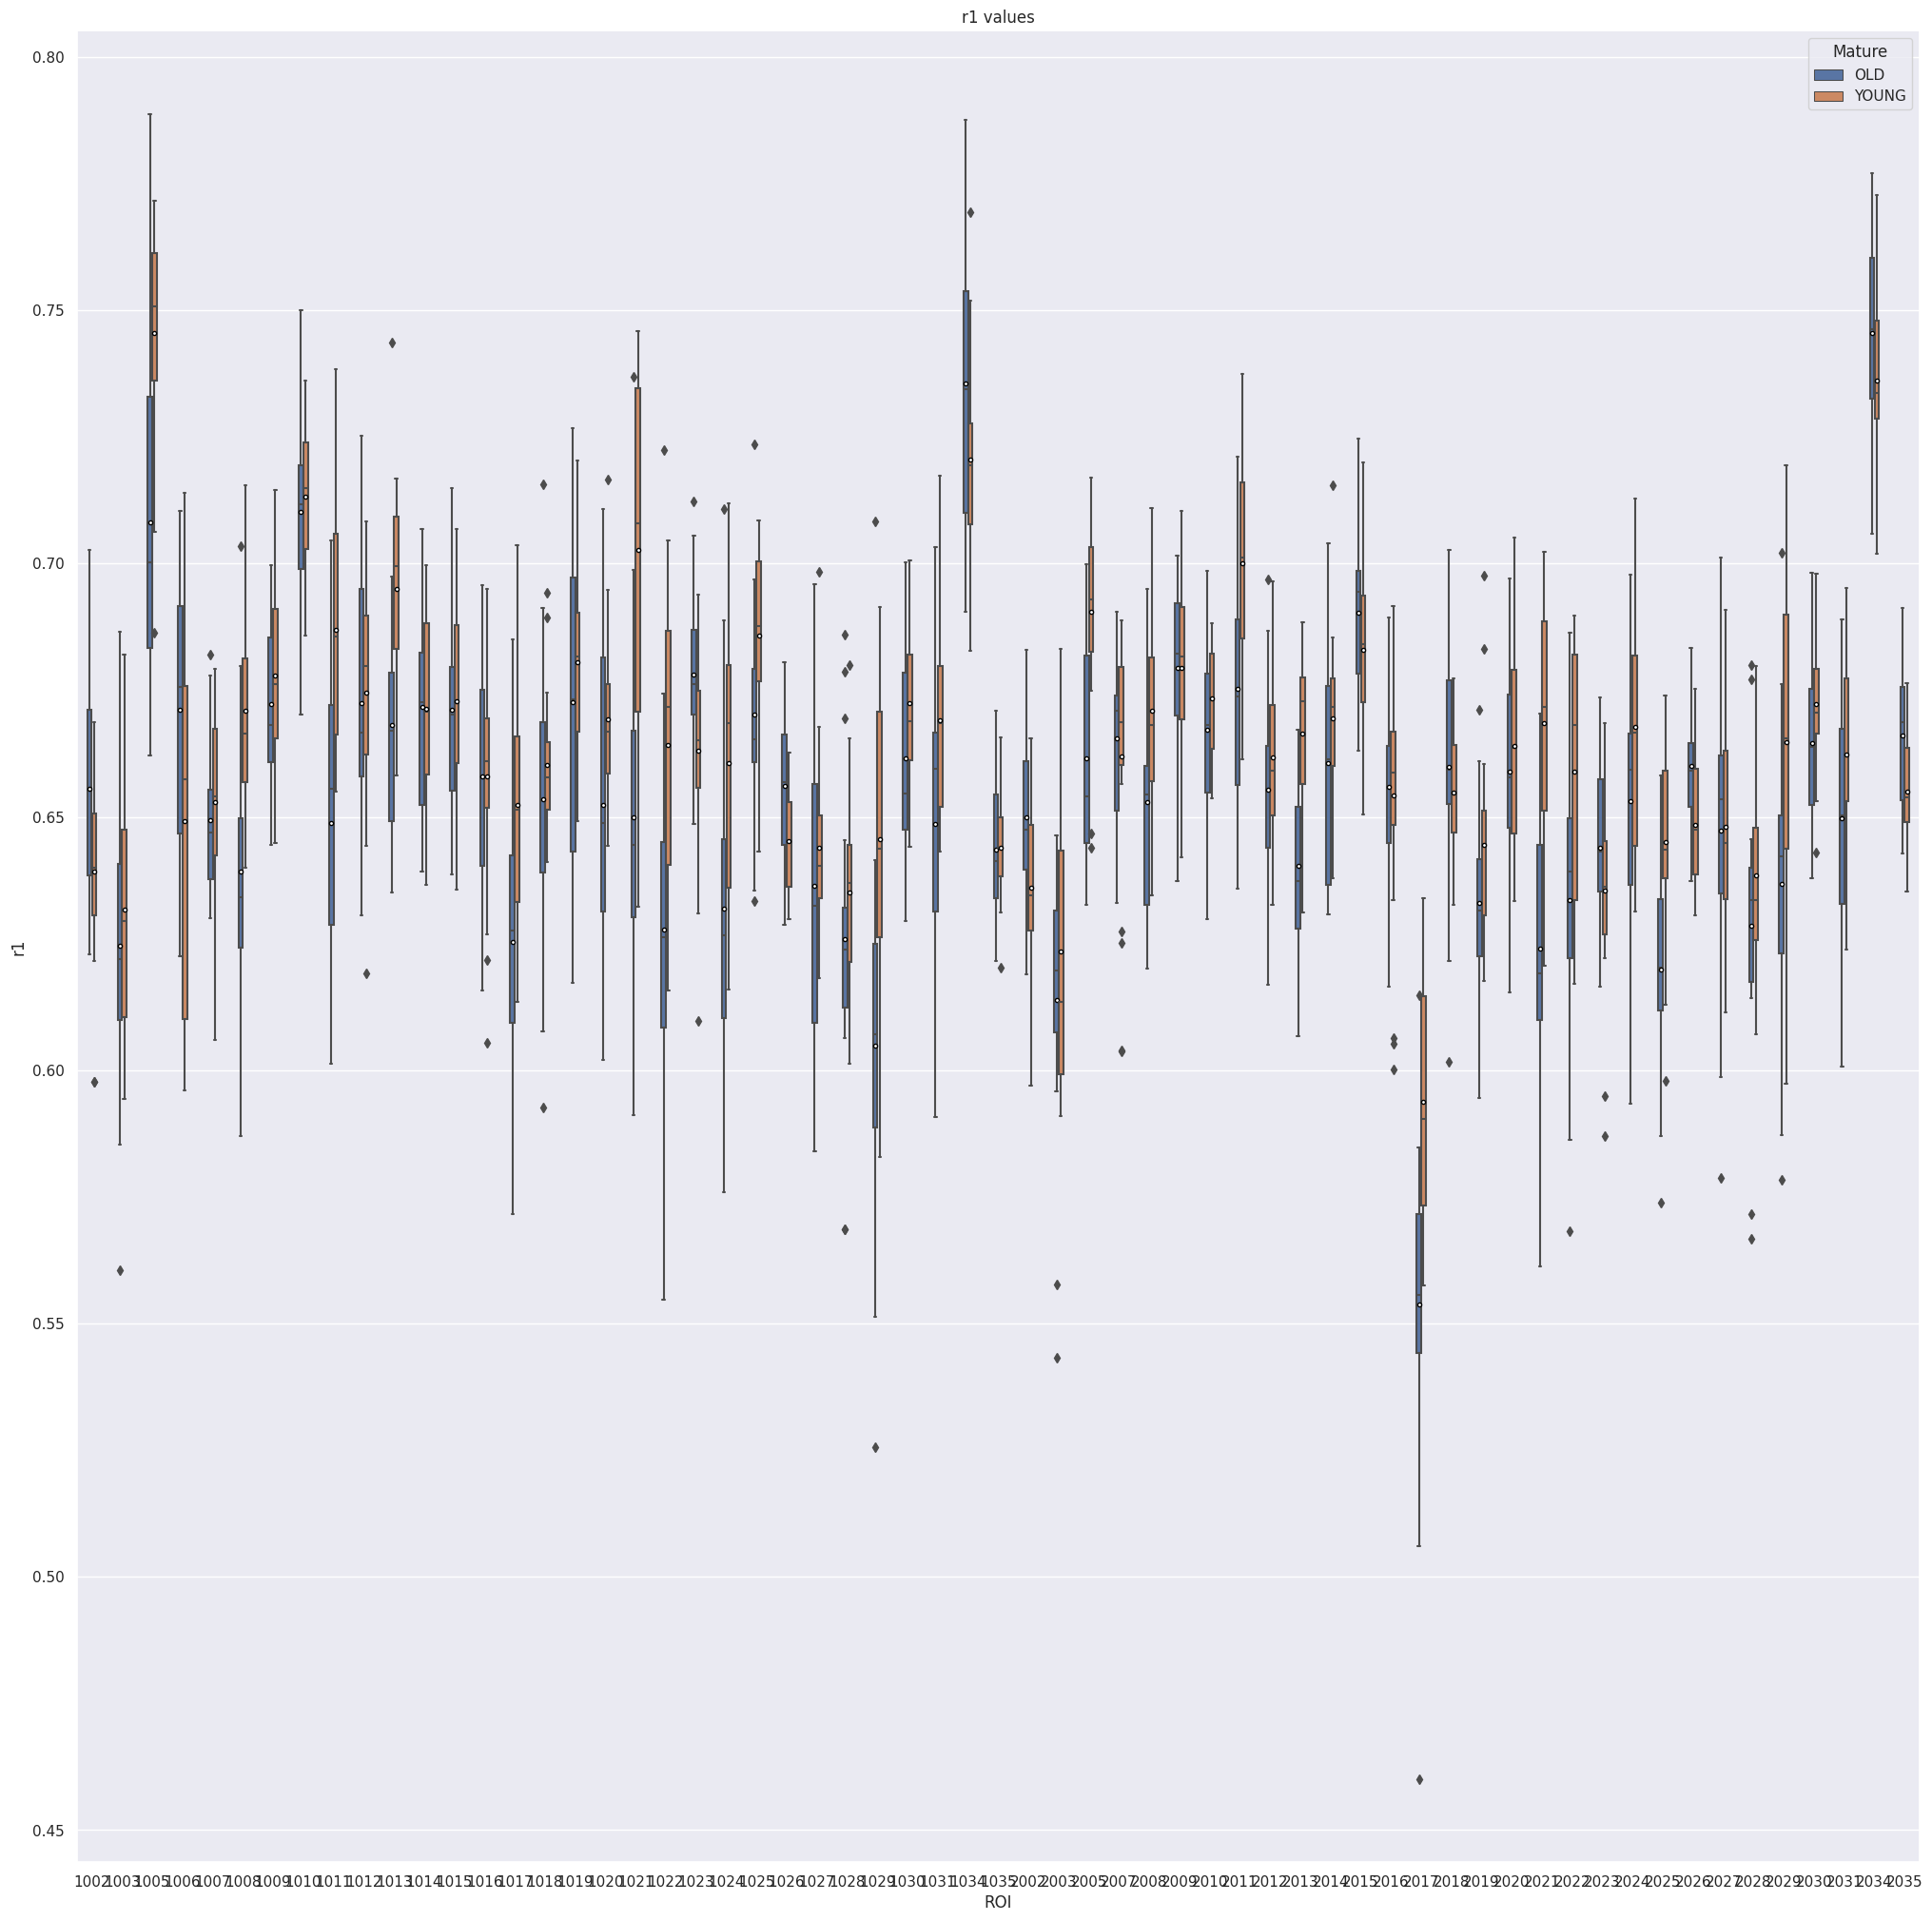

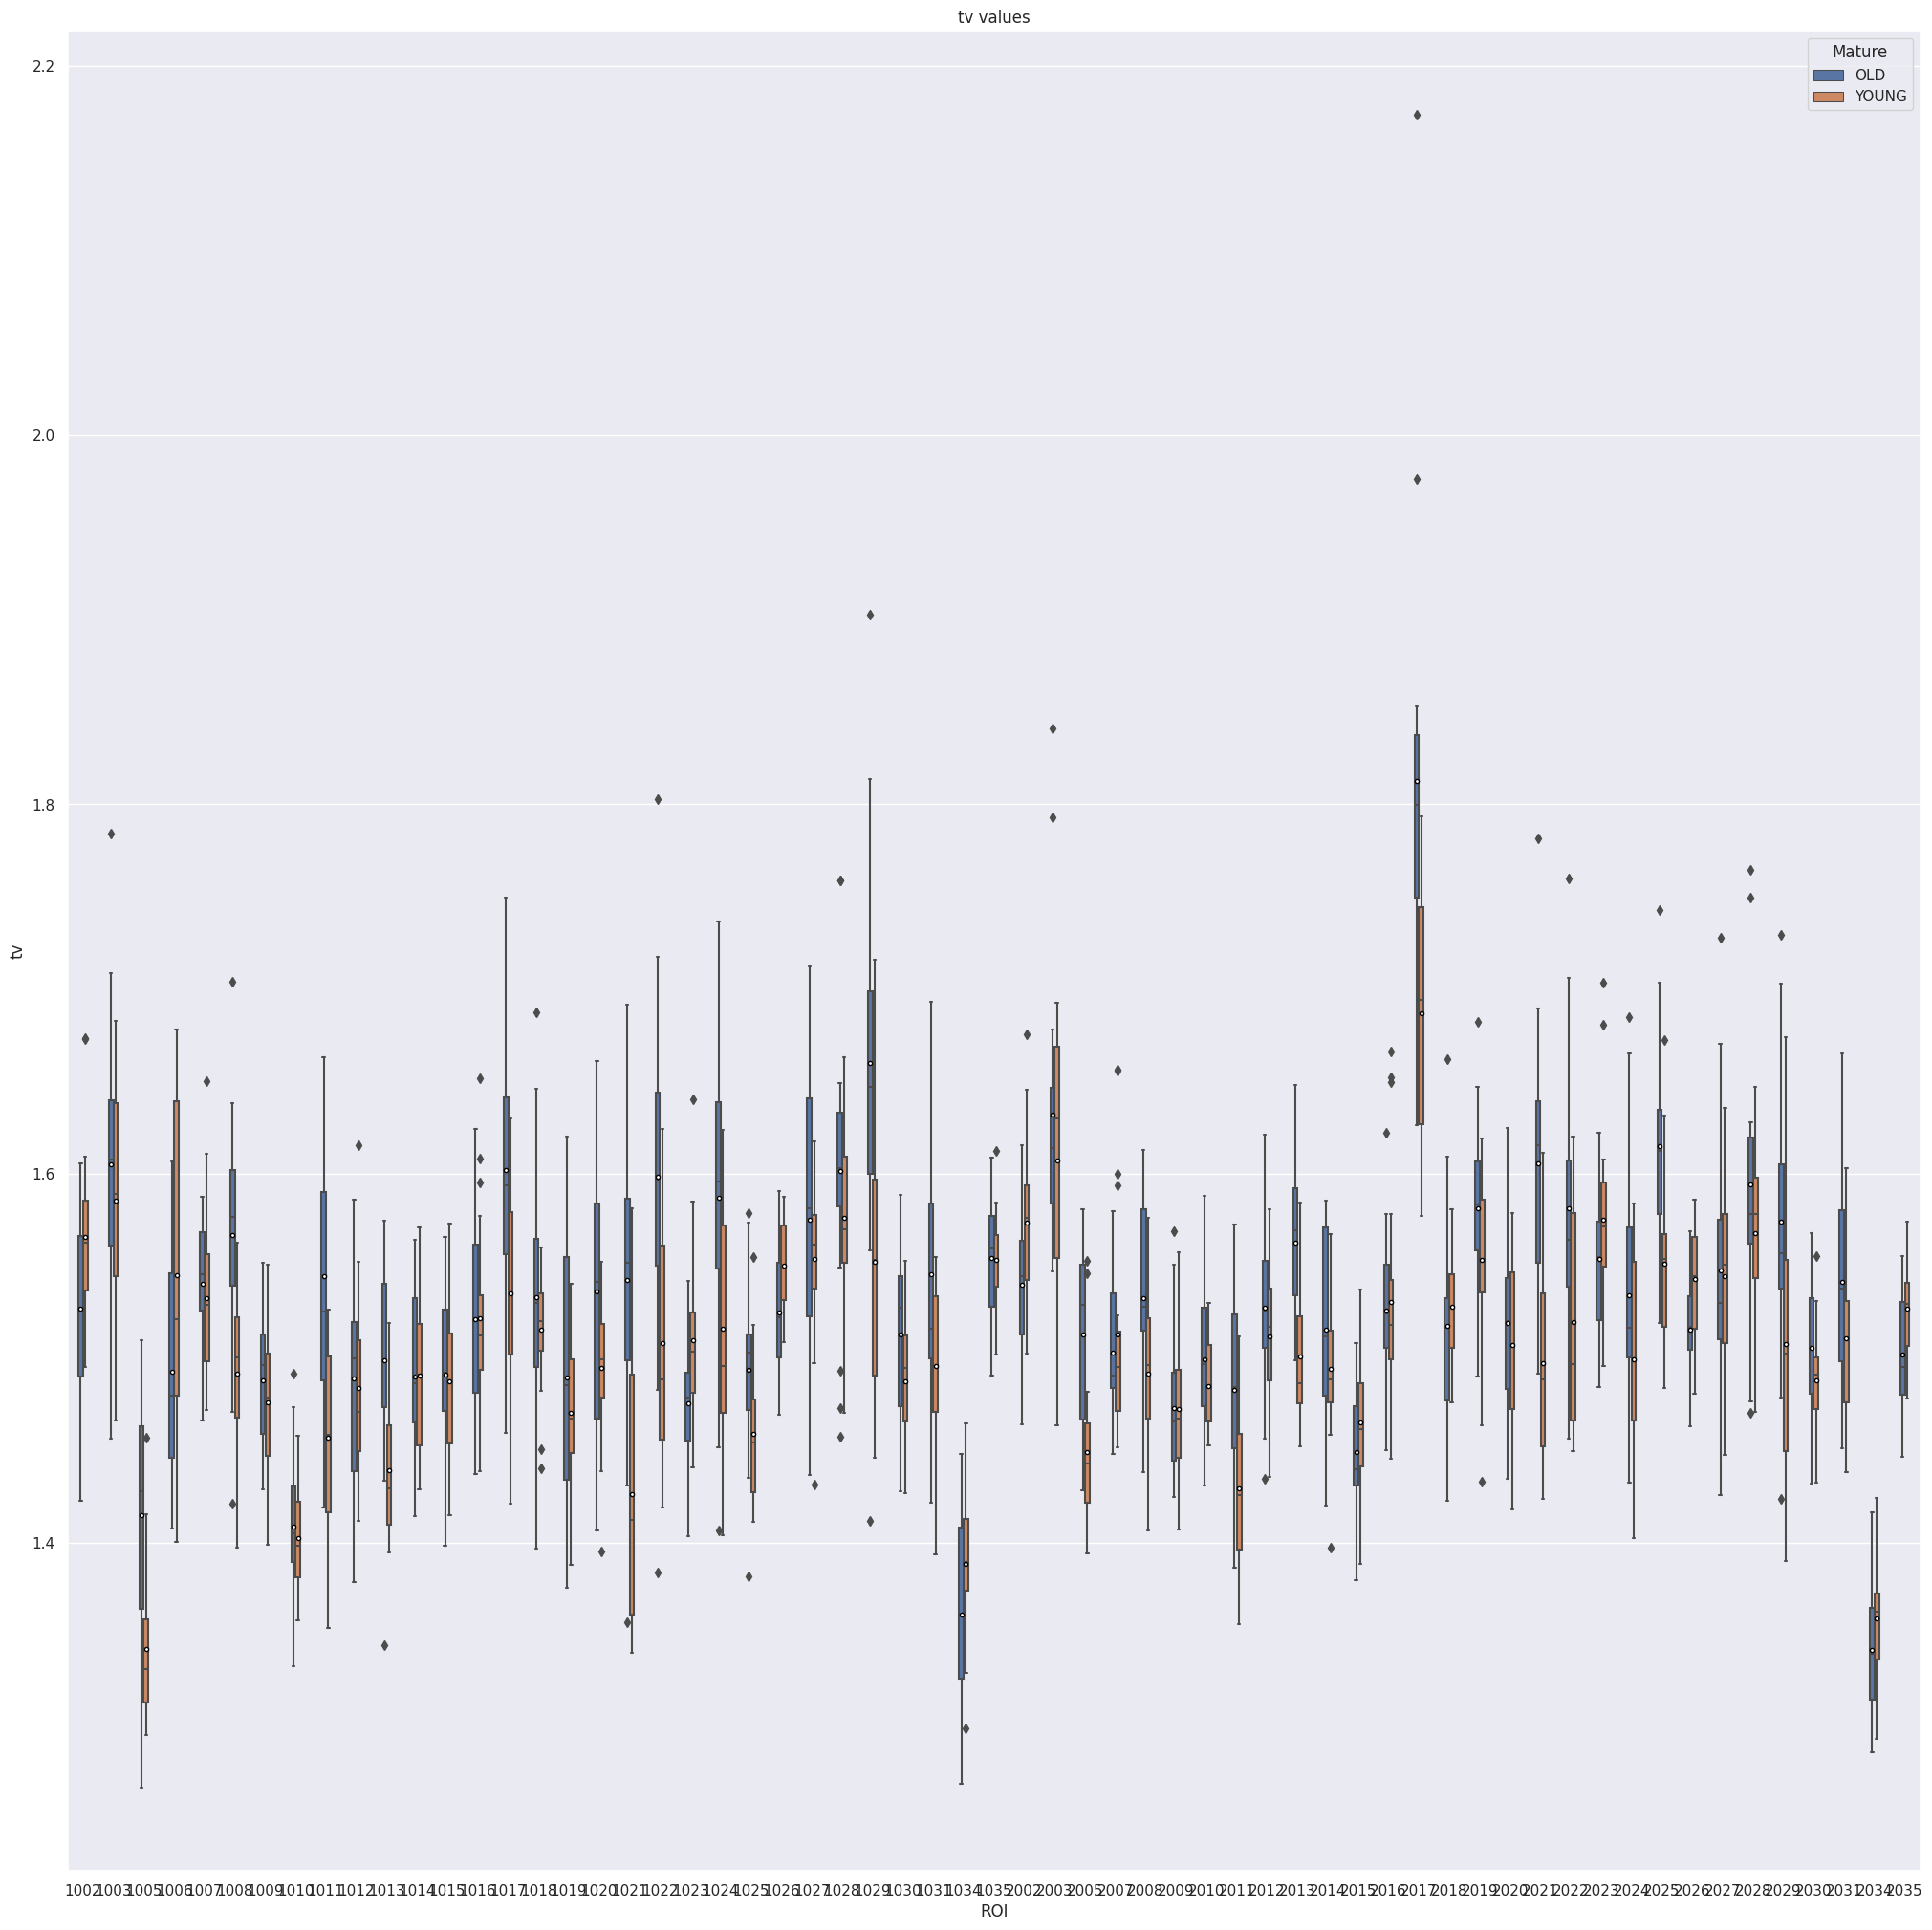

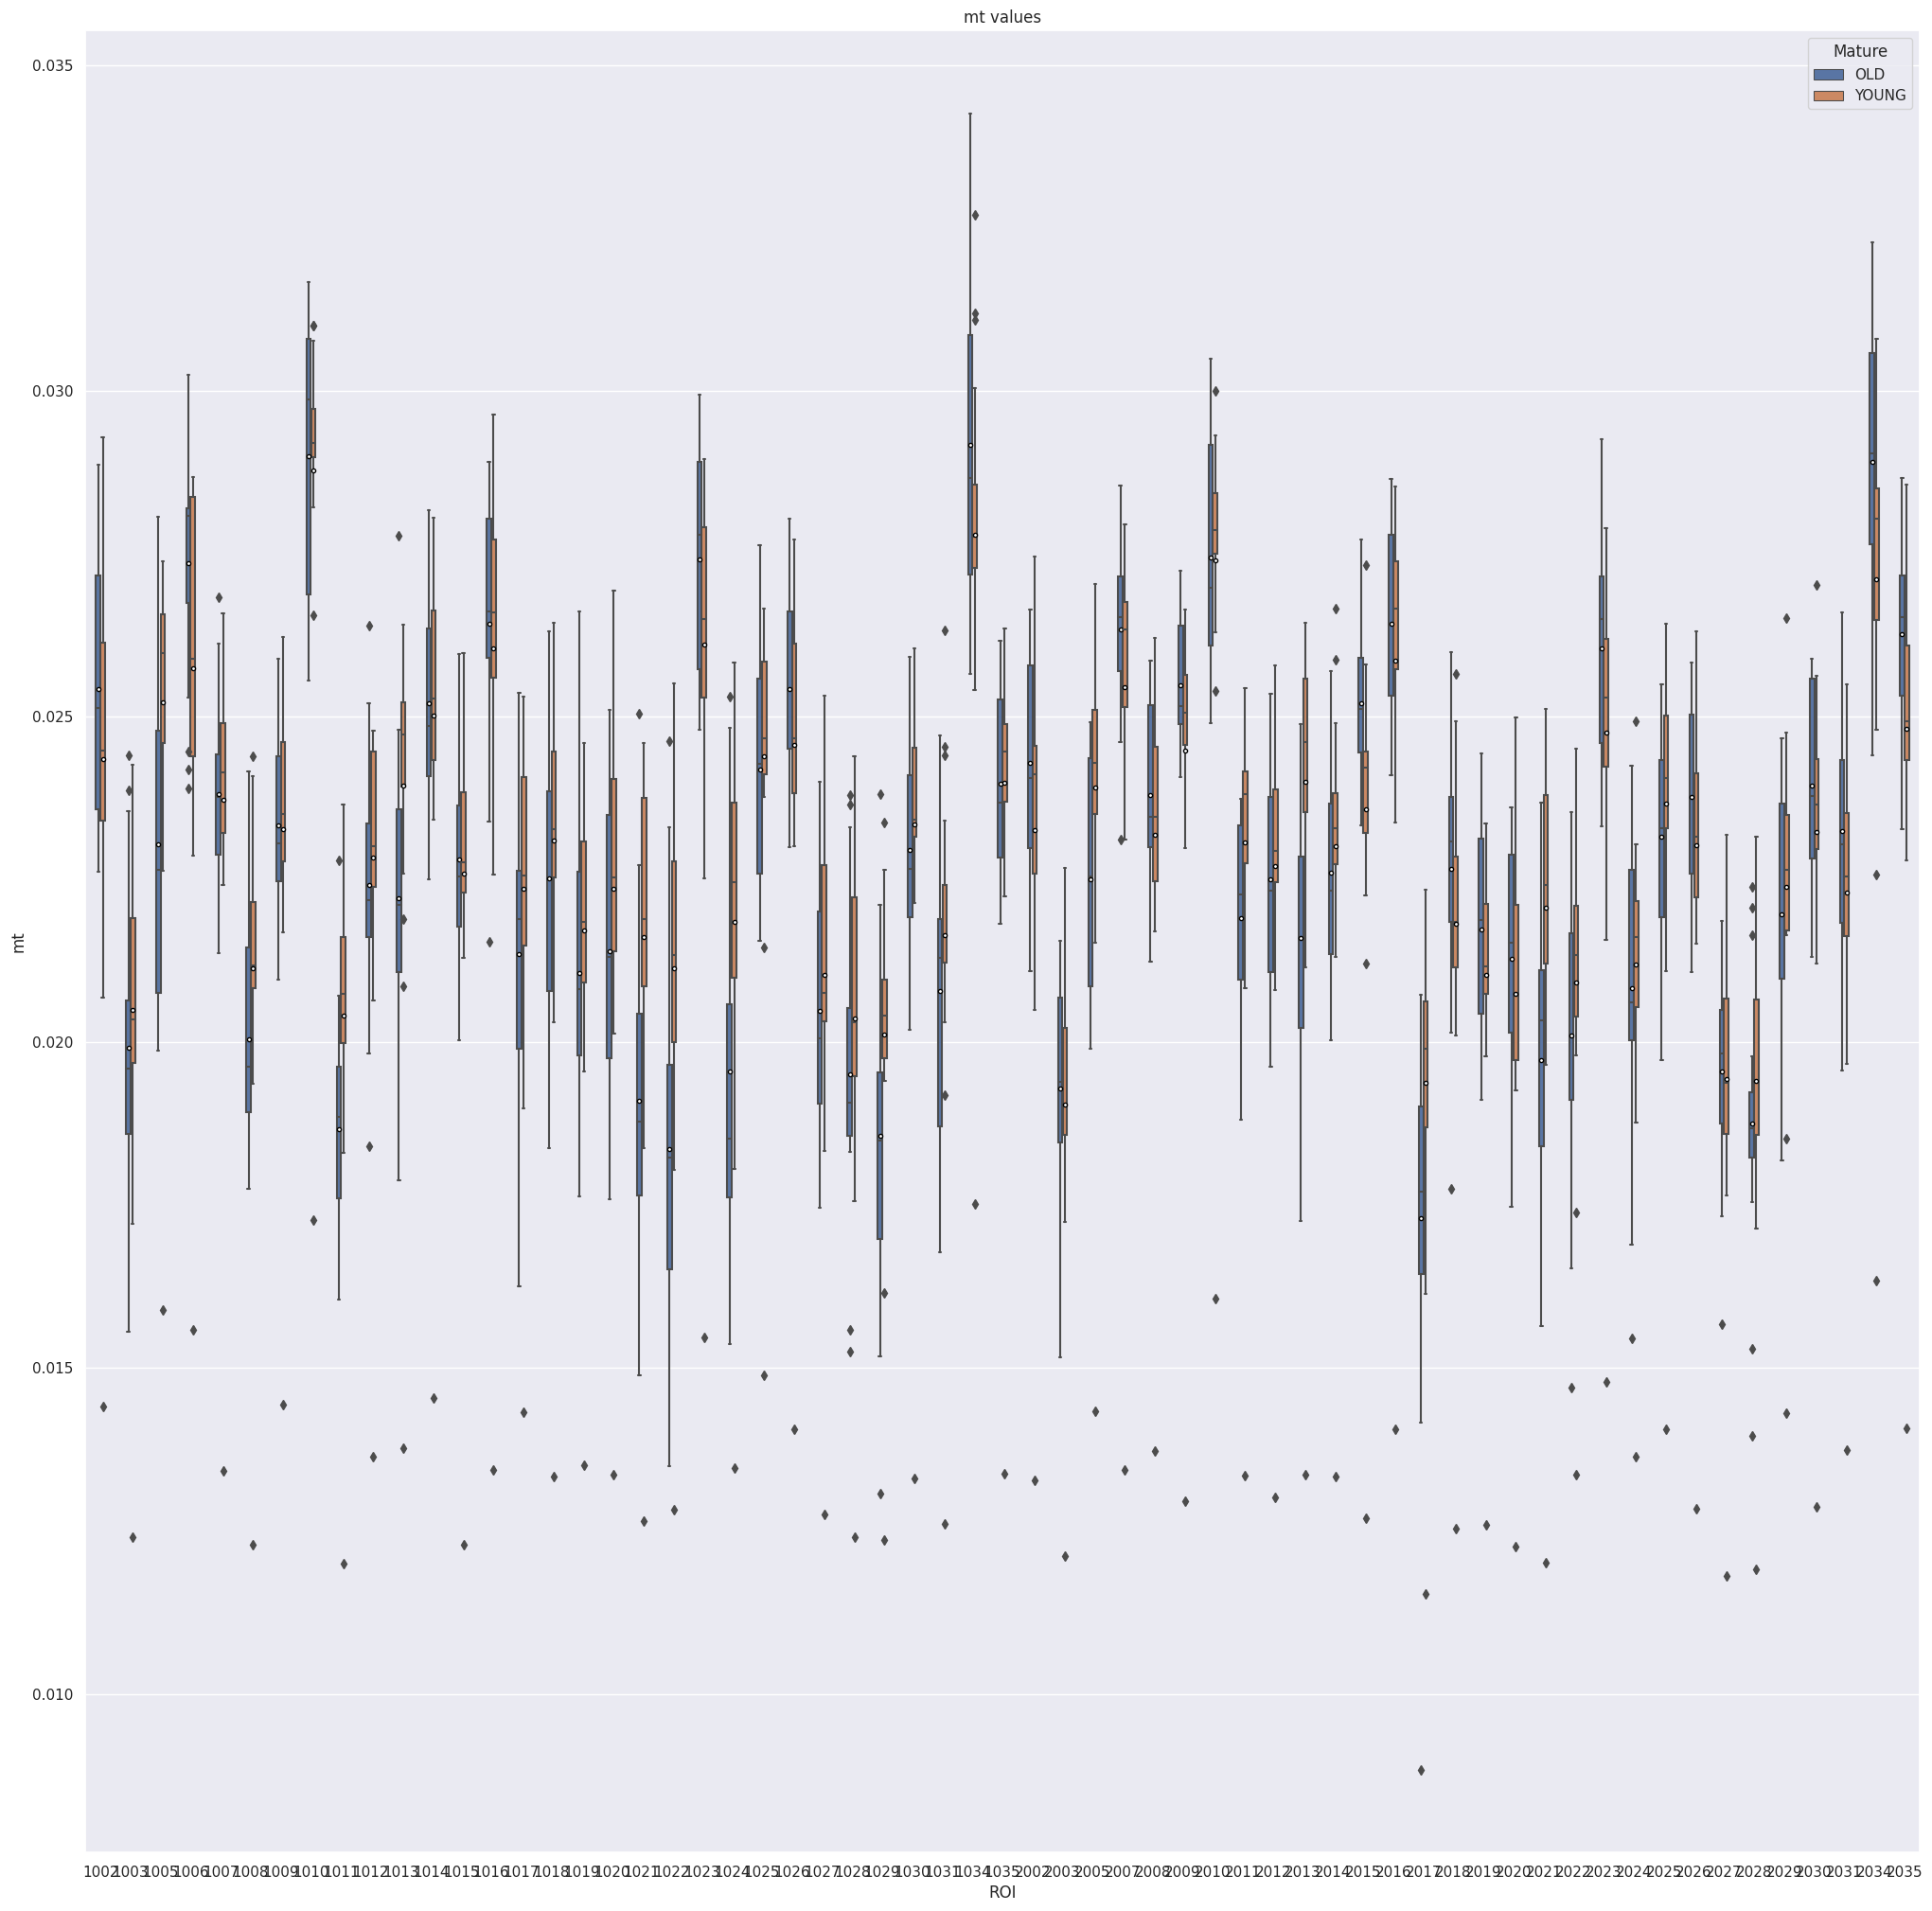

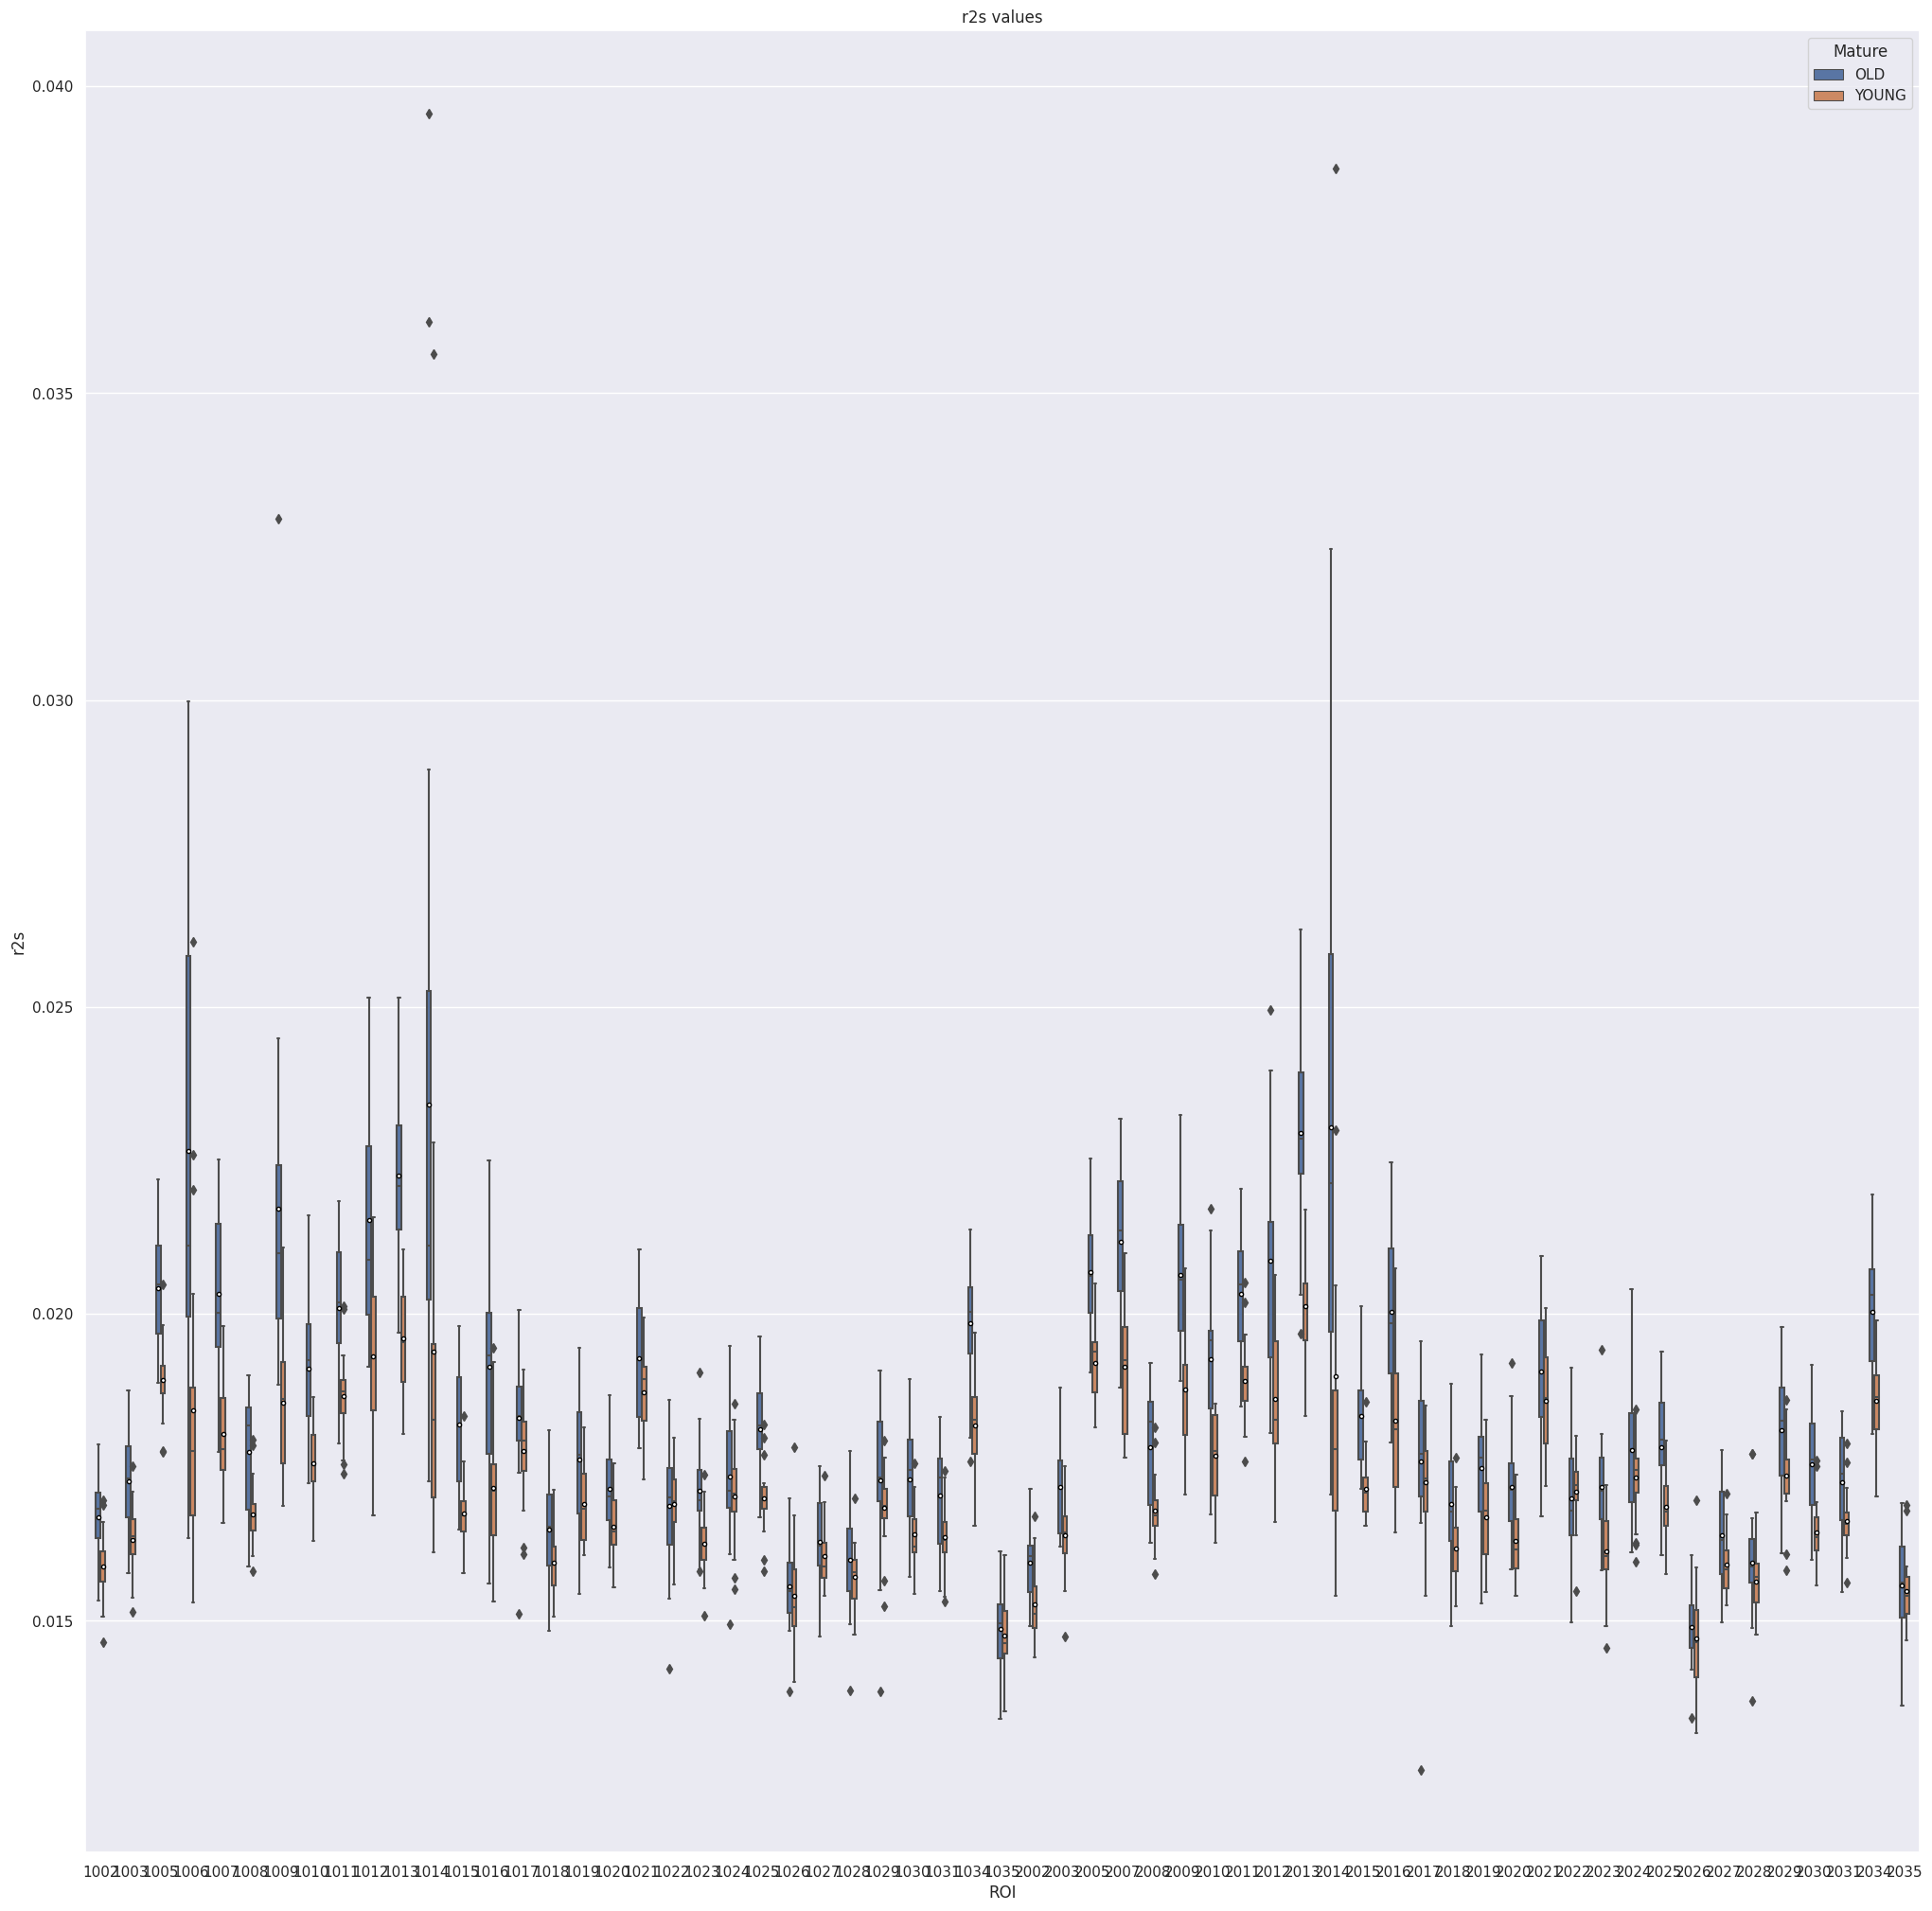

In [5]:
plt.close()
StatisticsWrapper.plot_data_per_param_per_roi_next_to_each_other(young_subjects, old_subjects,
                                                                    params_to_work_with,
                                                                    group_a_name, group_b_name)

In [6]:
def extract_outliers(data, param):
     outliers = {}
     threshold = 1.5

     for roi_value, roi_name in chosen_rois_dict.items():
          roi_to_check_data = data[data.ROI == roi_value]
          Q1 = roi_to_check_data[param].quantile(0.25)
          Q3 = roi_to_check_data[param].quantile(0.75)
          IQR = Q3 - Q1


          outliers_df = roi_to_check_data[(roi_to_check_data[param] < Q1 - threshold * IQR) | (roi_to_check_data[param] > Q3 + threshold * IQR)]

          if outliers_df.subjects.values.size > 0:
               outliers[roi_value] = outliers_df.subjects.tolist()

     return outliers

In [7]:
for param in params_to_work_with:
    subjects_outliers_counter = {}
    outliers = extract_outliers(chosen_data, param)

    for roi, roi_outliers in outliers.items():
            for outlier in roi_outliers:
                if outlier in subjects_outliers_counter:
                    subjects_outliers_counter[outlier] += 1
                else:
                    subjects_outliers_counter[outlier]  = 1

    subjects_outliers_counter = dict(sorted(subjects_outliers_counter.items(), key=lambda item: item[1], reverse=True))
    print(f'{param} outliers: {outliers}')
    print(f'{param} outliers counter: {subjects_outliers_counter}')
    print('----------------------------------------------------------')

r1 outliers: {1007: ['H056_LE'], 1018: ['H041_VG', 'H050_AB'], 1020: ['H032_JD'], 1023: ['H028_LC'], 1027: ['H044_AZ'], 1028: ['H023_IN', 'H039_JH', 'H041_VG', 'H044_AZ', 'H050_AB'], 1031: ['H023_IN', 'H032_JD'], 2003: ['H050_AB'], 2007: ['H037_YB', 'H053_ED', 'H054_AE', 'H056_LE'], 2010: ['H046_NB'], 2016: ['H053_ED', 'H054_AE', 'H056_LE'], 2017: ['H023_IN'], 2018: ['H023_IN', 'H039_JH'], 2019: ['H044_AZ'], 2023: ['H028_LC'], 2025: ['H023_IN'], 2027: ['H023_IN'], 2028: ['H023_IN', 'H039_JH', 'H041_VG', 'H050_AB', 'H054_AE', 'H055_MY', 'H056_LE']}
r1 outliers counter: {'H023_IN': 7, 'H056_LE': 4, 'H050_AB': 4, 'H041_VG': 3, 'H044_AZ': 3, 'H039_JH': 3, 'H054_AE': 3, 'H032_JD': 2, 'H028_LC': 2, 'H053_ED': 2, 'H037_YB': 1, 'H046_NB': 1, 'H055_MY': 1}
----------------------------------------------------------
tv outliers: {1003: ['H050_AB'], 1007: ['H056_LE'], 1008: ['H023_IN'], 1011: ['H025_SH'], 1018: ['H023_IN', 'H041_VG', 'H050_AB'], 1020: ['H032_JD', 'H050_AB'], 1022: ['H050_AB'], 102

In [59]:
new_data = chosen_data[~chosen_data.subjects.isin(['H023_IN'])]
new_young_subjects, new_old_subjects = StatisticsWrapper.seperate_data_to_two_groups(new_data, col_divider, threshold)

In [ ]:
plt.close()
StatisticsWrapper.plot_data_per_param_per_roi_next_to_each_other(new_young_subjects, new_old_subjects,
                                                                    ['r1'],
                                                                    group_a_name, group_b_name)

In [8]:
data_path = os.path.join(constants.ANALYSIS_DIR, 'H023_IN')
seg_path = os.path.join(data_path, os.listdir(data_path)[0], constants.BASIC_SEG)
brain_path = os.path.join(data_path, os.listdir(data_path)[0], constants.MAP_R1)

In [9]:
os.system(f'freeview -v {brain_path} {seg_path}:colormap=lut &')

0